# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hobart
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | chulman
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | nabire
Processing Record 6 of Set 1 | barcelos
Processing Record 7 of Set 1 | caravelas
Processing Record 8 of Set 1 | georgetown
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | kapaa
Processing Record 11 of Set 1 | puerto ayora
Processing Record 12 of Set 1 | yulara
Processing Record 13 of Set 1 | norman wells
Processing Record 14 of Set 1 | neiafu
Processing Record 15 of Set 1 | ugoofaaru
Processing Record 16 of Set 1 | malakal
Processing Record 17 of Set 1 | isangel
Processing Record 18 of Set 1 | atuona
Processing Record 19 of Set 1 | leningradskiy
Processing Record 20 of Set 1 | cape town
Processing Record 21 of Set 1 | longyearbyen
Processing Record 22 of Set 1 | hithadhoo
Processing Record 23 of Set 1 | consti

Processing Record 36 of Set 4 | ancud
Processing Record 37 of Set 4 | aykhal
Processing Record 38 of Set 4 | sobolevo
Processing Record 39 of Set 4 | xingyi
Processing Record 40 of Set 4 | carson city
Processing Record 41 of Set 4 | mar del plata
Processing Record 42 of Set 4 | qaanaaq
Processing Record 43 of Set 4 | auki
Processing Record 44 of Set 4 | arraial do cabo
Processing Record 45 of Set 4 | port lincoln
Processing Record 46 of Set 4 | traverse city
Processing Record 47 of Set 4 | saint-philippe
Processing Record 48 of Set 4 | linxi
Processing Record 49 of Set 4 | yar-sale
Processing Record 0 of Set 5 | saldanha
Processing Record 1 of Set 5 | katherine
Processing Record 2 of Set 5 | fare
Processing Record 3 of Set 5 | srandakan
Processing Record 4 of Set 5 | ayagoz
Processing Record 5 of Set 5 | santa cruz del sur
Processing Record 6 of Set 5 | bur gabo
City not found. Skipping...
Processing Record 7 of Set 5 | newcastle
Processing Record 8 of Set 5 | benjamin hill
Processing 

Processing Record 25 of Set 8 | luwuk
Processing Record 26 of Set 8 | bambanglipuro
Processing Record 27 of Set 8 | dayong
Processing Record 28 of Set 8 | imeni poliny osipenko
Processing Record 29 of Set 8 | kem
Processing Record 30 of Set 8 | dicabisagan
Processing Record 31 of Set 8 | rio claro
Processing Record 32 of Set 8 | sahrak
City not found. Skipping...
Processing Record 33 of Set 8 | charters towers
Processing Record 34 of Set 8 | urulga
City not found. Skipping...
Processing Record 35 of Set 8 | huilong
Processing Record 36 of Set 8 | roald
Processing Record 37 of Set 8 | kaeo
Processing Record 38 of Set 8 | caceres
Processing Record 39 of Set 8 | chipinge
Processing Record 40 of Set 8 | shingu
Processing Record 41 of Set 8 | ghanzi
Processing Record 42 of Set 8 | mackay
Processing Record 43 of Set 8 | buluang
Processing Record 44 of Set 8 | moranbah
Processing Record 45 of Set 8 | pinsk
Processing Record 46 of Set 8 | krasnoselkup
Processing Record 47 of Set 8 | formoso do

Processing Record 9 of Set 12 | khed
Processing Record 10 of Set 12 | marawi
Processing Record 11 of Set 12 | mwinilunga
Processing Record 12 of Set 12 | bubaque
Processing Record 13 of Set 12 | tobane
Processing Record 14 of Set 12 | kamenskoye
City not found. Skipping...
Processing Record 15 of Set 12 | lleida
Processing Record 16 of Set 12 | potosi
Processing Record 17 of Set 12 | labutta
City not found. Skipping...
Processing Record 18 of Set 12 | baturite
Processing Record 19 of Set 12 | miranda
Processing Record 20 of Set 12 | kitoy
Processing Record 21 of Set 12 | itarema
Processing Record 22 of Set 12 | beatrice
Processing Record 23 of Set 12 | zabid
Processing Record 24 of Set 12 | francisco morato
Processing Record 25 of Set 12 | chapais
Processing Record 26 of Set 12 | coquimbo
Processing Record 27 of Set 12 | egvekinot
Processing Record 28 of Set 12 | molchanovo
Processing Record 29 of Set 12 | zheleznodorozhnyy
Processing Record 30 of Set 12 | the valley
Processing Record 

In [15]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          593
Lat           593
Lng           593
Max Temp      593
Humidity      593
Cloudiness    593
Wind Speed    593
Country       593
Date          593
dtype: int64

In [24]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,279.96,87,20,4.63,AR,1680575437
1,san cristobal,7.7669,-72.2250,296.25,80,64,0.71,VE,1680575722
2,diofior,14.1833,-16.6667,294.09,79,6,2.52,SN,1680575592
3,vao,-22.6667,167.4833,299.06,80,13,3.55,NC,1680575723
4,cueramaro,20.6167,-101.7167,298.83,29,38,3.46,MX,1680575724


In [26]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [28]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,279.96,87,20,4.63,AR,1680575437
1,san cristobal,7.7669,-72.2250,296.25,80,64,0.71,VE,1680575722
2,diofior,14.1833,-16.6667,294.09,79,6,2.52,SN,1680575592
3,vao,-22.6667,167.4833,299.06,80,13,3.55,NC,1680575723
4,cueramaro,20.6167,-101.7167,298.83,29,38,3.46,MX,1680575724


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

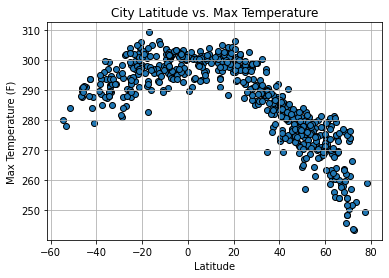

In [29]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LvTFig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

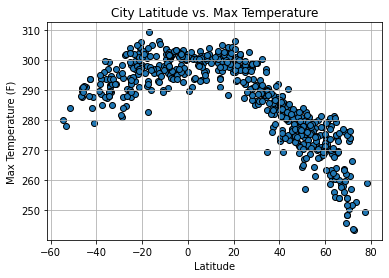

In [30]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LvHFig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

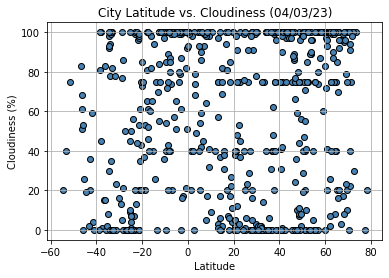

In [31]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", facecolors="steelblue")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LvCFig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

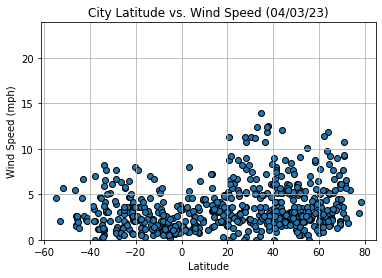

In [32]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Set the y axis limits
plt.ylim(0, max(city_data_df["Wind Speed"])+10)

# Incorporate the grid
plt.grid()


# Save the figure
plt.savefig("LvWFig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [33]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, text_coordinates):
    # Run linear regression on x and y values
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept

    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create scatter plot with linear regression line
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")

    # Annotate the linear regression equation and r-value
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.annotate(f"r-squared = {round(rvalue**2, 2)}", (text_coordinates[0], text_coordinates[1]-20), fontsize=15,color="red")

    # Set x and y limits
    plt.xlim(min(x_values)-5, max(x_values)+5)
    plt.ylim(min(y_values)-5, max(y_values)+5)

    # Set x and y labels
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Set plot title
    plt.title(title)

In [34]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,san cristobal,7.7669,-72.2250,296.25,80,64,0.71,VE,1680575722
2,diofior,14.1833,-16.6667,294.09,79,6,2.52,SN,1680575592
4,cueramaro,20.6167,-101.7167,298.83,29,38,3.46,MX,1680575724
6,beibei,29.8256,106.4339,291.69,63,78,1.91,CN,1680575724
9,say,13.1007,2.3689,302.46,11,57,1.46,NE,1680575725


In [35]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,279.96,87,20,4.63,AR,1680575437
3,vao,-22.6667,167.4833,299.06,80,13,3.55,NC,1680575723
5,hermanus,-34.4187,19.2345,289.17,81,98,2.13,ZA,1680575724
7,punta arenas,-53.1500,-70.9167,278.21,75,40,2.06,CL,1680575724
8,rikitea,-23.1203,-134.9692,299.61,82,99,6.48,PF,1680575621


###  Temperature vs. Latitude Linear Regression Plot

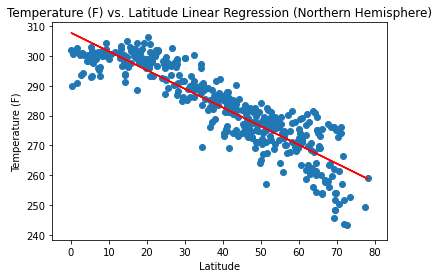

In [37]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
title = "Temperature (F) vs. Latitude Linear Regression (Northern Hemisphere)"
xlabel = "Latitude"
ylabel = "Temperature (F)"
text_coordinates = (0, -30)
plot_linear_regression(x_values, y_values, title, xlabel, ylabel, text_coordinates)

#Save the figure
plt.savefig("LRNHFig5.png")

#Show plot
plt.show()

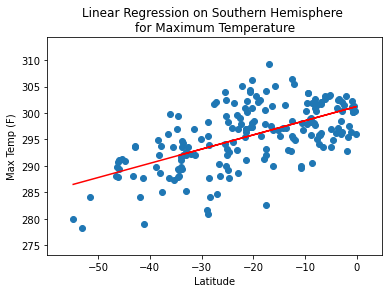

In [39]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

plot_linear_regression(x_values, y_values, 'Linear Regression on Southern Hemisphere \nfor Maximum Temperature', 'Latitude', 'Max Temp (F)', (-50, 90))
plt.savefig("LRSHFig2.png")
plt.show()

**Discussion about the linear relationship:** Latitude locations closer to the equator are highter in temperature. Latitude locations further away from the equator the temperature decreases. 

### Humidity vs. Latitude Linear Regression Plot

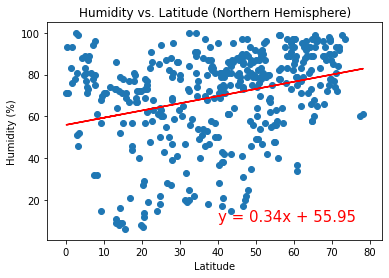

In [42]:
# Northern Hemisphere
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Plot linear regression for Humidity vs. Latitude in Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Humidity vs. Latitude (Northern Hemisphere)", "Latitude", "Humidity (%)", (40, 10))
plt.savefig("NHLRHvLFig8.png")
plt.show()

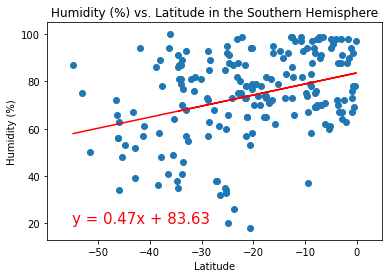

In [43]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], 
                       "Humidity (%) vs. Latitude in the Southern Hemisphere", "Latitude", "Humidity (%)", (-55,20))
plt.savefig("SHLRHvLFig8.png")
plt.show()

**Discussion about the linear relationship:** The northern hempisphere is shown to have highter in humidity than the southen hempishere. 

### Cloudiness vs. Latitude Linear Regression Plot

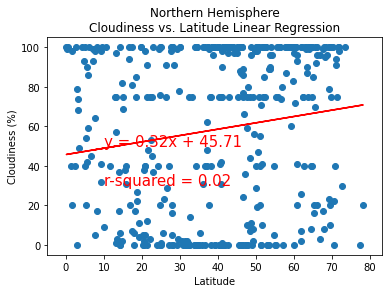

In [45]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call plot_linear_regression function and pass x and y values along with title, x and y labels, and text coordinates
plot_linear_regression(x_values, y_values, "Northern Hemisphere\nCloudiness vs. Latitude Linear Regression", "Latitude", "Cloudiness (%)", (10,50))


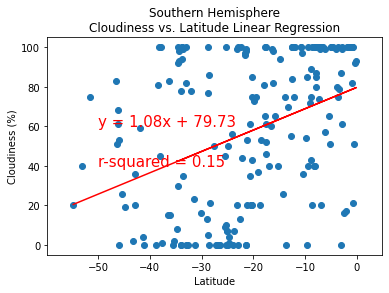

In [46]:
# Southern Hemisphere
# Define variables for x and y values
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call plot_linear_regression function and pass x and y values along with title, x and y labels, and text coordinates
plot_linear_regression(x_values, y_values, "Southern Hemisphere\nCloudiness vs. Latitude Linear Regression", "Latitude", "Cloudiness (%)", (-50,60))


**Discussion about the linear relationship:** Both the northern and southern hemispheres receive a random amount of cloud coverage, but clouds are shown to be more prominent in the northern hemisphere. 

### Wind Speed vs. Latitude Linear Regression Plot

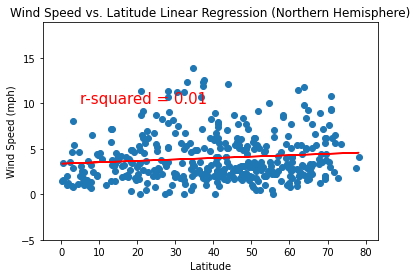

In [47]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"],
"Wind Speed vs. Latitude Linear Regression (Northern Hemisphere)",
"Latitude", "Wind Speed (mph)", (5,30))

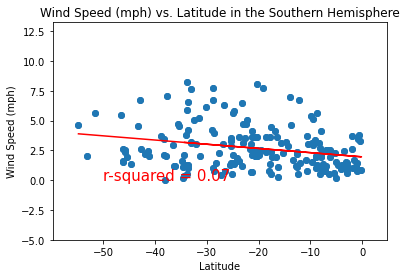

In [48]:
# Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], color="steelblue")

#Call the function to create linear regression and plot
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"],
"Wind Speed (mph) vs. Latitude in the Southern Hemisphere",
"Latitude", "Wind Speed (mph)", (-50, 20))

**Discussion about the linear relationship:** It's found that the wind speed is more prominent in the northern hemisphere. 